<a href="https://colab.research.google.com/github/OSLL/sirius-cv/blob/Goncharova_Arina/40pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
!kaggle datasets download -d sagnikmazumder37/malaria-cell-imagesshuffled-and-split

 99% 321M/323M [00:02<00:00, 113MB/s]
100% 323M/323M [00:02<00:00, 126MB/s]


In [6]:
!unzip \*.zip  && rm *.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103326_cell_162.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103326_cell_163.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_146.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_150.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_151.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_155.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_169.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_171.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_175.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_178.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_179.png  
  inflating: val/Parasitized/C184P145ThinF_IMG_20151203_103637_cell_184.pn

In [ ]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
class SmallerVGGNet:
	@staticmethod
	def build(width, height, depth, classes, finalAct="softmax"):
		# инициализируем модель вместе с формой входных
		# данных "channels last" и размерностью каналов
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1
 
		# если мы используем "channels first", обновляем форму
		# входных данных и размерность каналов
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1
      # CONV =&gt; RELU =&gt; POOL
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(3, 3)))
		model.add(Dropout(0.25))
  # (CONV => RELU) * 2 => POOL
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
 
		# (CONV => RELU) * 2 => POOL
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
  # первый (и единственный) набор слоёв FC =&gt; RELU
		model.add(Flatten())
		model.add(Dense(1024))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
 
		# используйте *softmax* активацию для классификации 
		# по одной метке и *sigmoid* по нескольким
		model.add(Dense(classes))
		model.add(Activation(finalAct))
 
		# возвращаем сетевую архитектуру
		return model

In [ ]:
pip3 install pyimagesearch

SyntaxError: ignored

Выходные данные были обрезаны до нескольких последних строк (5000).
/content/train/Parasitized/C189P150ThinF_IMG_20151203_141719_cell_55.png
/content/train/Parasitized/C184P145ThinF_IMG_20151203_102405_cell_180.png
/content/train/Parasitized/C129P90ThinF_IMG_20151004_134520_cell_115.png
/content/train/Parasitized/C91P52ThinF_IMG_20150821_125154_cell_206.png
/content/train/Parasitized/C39P4thinF_original_IMG_20150622_111206_cell_112.png
/content/train/Uninfected/C82P43ThinF_IMG_20150817_124010_cell_58.png
/content/train/Uninfected/C113P74ThinF_IMG_20150930_134751_cell_83.png
/content/train/Uninfected/C226ThinF_IMG_20151112_131731_cell_80.png
/content/train/Parasitized/C101P62ThinF_IMG_20150918_151942_cell_68.png
/content/train/Uninfected/C118P79ThinF_IMG_20151002_105827_cell_37.png
/content/train/Parasitized/C182P143NThinF_IMG_20151201_172842_cell_20.png
/content/train/Uninfected/C55P16thinF_IMG_20150728_121350_cell_78.png
/content/train/Parasitized/C71P32_ThinF_IMG_20150813_162016_cell

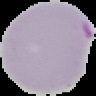

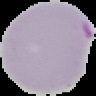

[INFO] compiling model...


In [3]:
# подключаем необходимые пакеты
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
#from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os
# создаём парсер аргументов и передаём их
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required=True,
#	help="path to input dataset (i.e., directory of images)")
#ap.add_argument("-m", "--model", required=True,
#	help="path to output model")
#ap.add_argument("-l", "--labelbin", required=True,
#	help="path to output label binarizer")
#ap.add_argument("-p", "--plot", type=str, default="plot.png",
#	help="path to output accuracy/loss plot")
#args = vars(ap.parse_args())
# инициализируем число эпох, скорость обучения,
# размер пакета и размерность изображения
EPOCHS = 75
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (96, 96, 3)
# берём пути к изображениям и рандомно перемешиваем
print("[INFO] loading images...")
imagePaths = sorted(list(paths.list_images('/content/train/')))
random.seed(42)
random.shuffle(imagePaths)
 
# инициализируем данные и метки
data = []
labels = []
# цикл по изображениям
for imagePath in imagePaths:
  print(imagePath)
  image = cv2.imread(imagePath)
  image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
  image = img_to_array(image)
  data.append(image)
 
	# извлекаем метку класса из пути к изображению и обновляем
	# список меток
  l = label = imagePath.split(os.path.sep)[-2].split("_")
  labels.append(l)
cv2_imshow(data[0])
 # масштабируем интенсивности пикселей в диапазон [0, 1]
#data = np.array(data, dtype="float") / 255.0
#labels = np.array(labels)
#print("[INFO] data matrix: {} images ({:.2f}MB)".format(
	#len(imagePaths), data.nbytes / (1024 * 1000.0)))
# бинаризуем метки с помощью многозначного 
# бинаризатора scikit-learn
#print("[INFO] class labels:")
#mlb = MultiLabelBinarizer()
#labels = mlb.fit_transform(labels)
 
# цикл по всем меткам
#for (i, label) in enumerate(mlb.classes_):
	#print("{}. {}".format(i + 1, label))

cv2_imshow(data[0])
 # разбиваем данные на обучающую и тестовую выборки, используя 80%
# данных для обучения и оставшиеся 20% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.2, random_state=42)
 
# создаём генератор для добавления изображений
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")
# инициализируем модель с активацией sigmoid
# для многозначной классификации
print("[INFO] compiling model...")
#model = SmallerVGGNet.build(
#	width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
#	depth=IMAGE_DIMS[2], classes=len(mlb.classes_),
#	finalAct="sigmoid")
 
# инициализируем оптимизатор
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# компилируем модель, используя двоичную кросс-энтропию
# вместо категориальной. Это может показаться нелогичным
# для многозначной классификации, но имейте в виду, что цель --
# обрабатывать каждую выходную метку как независимое
# распределение Бернулли
#model.compile(loss="binary_crossentropy", optimizer=opt,
	#metrics=["accuracy"])
 
